In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading the data

In [30]:
path_actor = "../../timeseries/blockchain_by_actor.csv"
path_external = "../../timeseries/external.csv"
path_global = "../../timeseries/global.csv" 

# Cleaning our data

We remove the useless rows, for exemple the ones that contain null values.

In [31]:
df_actor = pd.read_csv(path_actor, index_col=0, parse_dates=True) 
# drop all columns where year is 0
df_actor = df_actor.loc[:, (df_actor != 0).any(axis=0)]
df_actor.head(5)

,year,month,day,identity,received,nb_received,date,sum_fee,mean_fee_for100,nb_transactions,sent,self_spent,self_spent_estimated,nb_spent,spent
0,2015.0,1.0,1.0,HappyCoins.com,1.377590e+09,4.0,2015-01-01,49596.0,0.004957,4.0,1.277500e+09,0.0,0.0,8.0,1.277500e+09
1,2015.0,1.0,1.0,821,2.476057e+09,5.0,2015-01-01,10000.0,0.000851,1.0,1.174552e+09,0.0,0.0,2.0,1.174552e+09
2,2015.0,1.0,1.0,FortuneJack.com,1.201470e+08,29.0,2015-01-01,83000.0,0.194670,11.0,1.541127e+08,14158970.0,14158970.0,22.0,1.399538e+08
3,2015.0,1.0,1.0,396,1.906135e+10,70.0,2015-01-01,540000.0,0.023738,54.0,1.842989e+10,0.0,0.0,108.0,1.842989e+10
4,2015.0,1.0,1.0,SatoshiMines.com,7.401319e+08,193.0,2015-01-01,740000.0,0.447934,45.0,1.813624e+09,35044568.0,35044568.0,84.0,1.778579e+09


Let's create a new dataset based on the initial one but with new indexes.

In [32]:
# create a df copy
df_indexed_dates = df_actor.copy()



In [33]:
df_actor.columns

Index(['year', 'month', 'day', 'identity', 'received', 'nb_received', 'date',
       'sum_fee', 'mean_fee_for100', 'nb_transactions', 'sent', 'self_spent',
       'self_spent_estimated', 'nb_spent', 'spent'],
      dtype='object')

C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


array([[<Axes: xlabel='received', ylabel='received'>,
        <Axes: xlabel='nb_received', ylabel='received'>,
        <Axes: xlabel='nb_transactions', ylabel='received'>],
       [<Axes: xlabel='received', ylabel='nb_received'>,
        <Axes: xlabel='nb_received', ylabel='nb_received'>,
        <Axes: xlabel='nb_transactions', ylabel='nb_received'>],
       [<Axes: xlabel='received', ylabel='nb_transactions'>,
        <Axes: xlabel='nb_received', ylabel='nb_transactions'>,
        <Axes: xlabel='nb_transactions', ylabel='nb_transactions'>]],
      dtype=object)

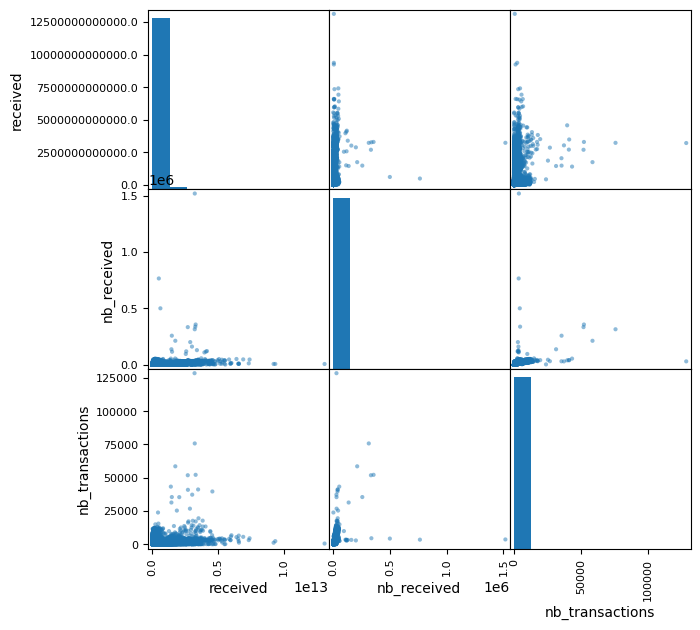

In [34]:
interresting_col = ['received', 'nb_received', 'nb_transactions']
interresting_col2 = ['sent', 'nb_spent', 'spent']
pd.plotting.scatter_matrix(df_actor[interresting_col], figsize=(7,7))

C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pandas\plotting\_matplotlib\misc.py:122: RuntimeWarning: invalid value encountered in cast
  if np.all(locs == locs.astype(int)):


array([[<Axes: xlabel='sent', ylabel='sent'>,
        <Axes: xlabel='nb_spent', ylabel='sent'>,
        <Axes: xlabel='spent', ylabel='sent'>],
       [<Axes: xlabel='sent', ylabel='nb_spent'>,
        <Axes: xlabel='nb_spent', ylabel='nb_spent'>,
        <Axes: xlabel='spent', ylabel='nb_spent'>],
       [<Axes: xlabel='sent', ylabel='spent'>,
        <Axes: xlabel='nb_spent', ylabel='spent'>,
        <Axes: xlabel='spent', ylabel='spent'>]], dtype=object)

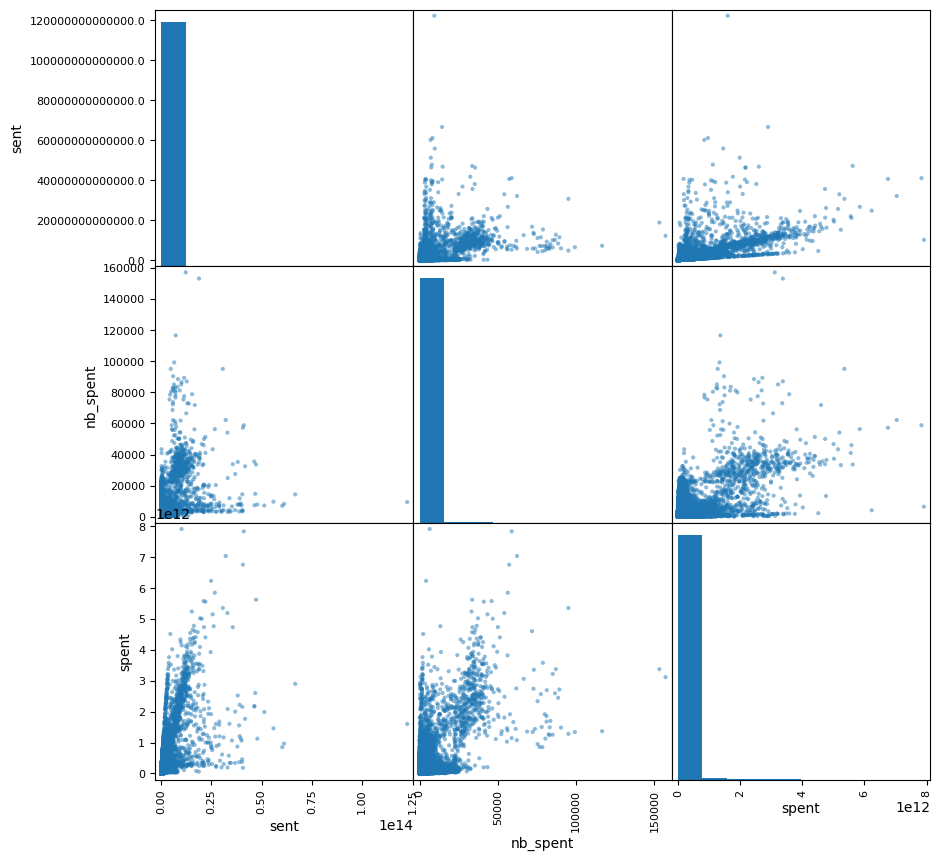

In [35]:
pd.plotting.scatter_matrix(df_actor[interresting_col2], figsize=(10,10))

#### Scale the data

In [45]:
import sklearn.preprocessing as preprocessing


col_scaled = ['received', 'nb_received', 'nb_transactions', 'sent', 'nb_spent', 'spent']
df_actor_scaled = df_actor[col_scaled]
df_actor_scaled.head(5)


,received,nb_received,nb_transactions,sent,nb_spent,spent
0,1.377590e+09,4.0,4.0,1.277500e+09,8.0,1.277500e+09
1,2.476057e+09,5.0,1.0,1.174552e+09,2.0,1.174552e+09
2,1.201470e+08,29.0,11.0,1.541127e+08,22.0,1.399538e+08
3,1.906135e+10,70.0,54.0,1.842989e+10,108.0,1.842989e+10
4,7.401319e+08,193.0,45.0,1.813624e+09,84.0,1.778579e+09


In [54]:
scaler = preprocessing.RobustScaler()

to_transform = ['received', 'sent', 'spent']
df_actor_scaled.loc[:, to_transform] = scaler.fit_transform(df_actor_scaled[to_transform])
df_actor_scaled.head(5)

C:\Users\chars\AppData\Local\Temp\ipykernel_14268\1651462916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actor_scaled.loc[:, to_transform] = scaler.fit_transform(df_actor_scaled[to_transform])


,received,nb_received,nb_transactions,sent,nb_spent,spent
0,-0.075172,4.0,4.0,-0.085126,8.0,-0.070300
1,-0.020498,5.0,1.0,-0.089525,2.0,-0.076276
2,-0.137759,29.0,11.0,-0.133122,22.0,-0.136331
3,0.804999,70.0,54.0,0.647694,108.0,0.925341
4,-0.106900,193.0,45.0,-0.062221,84.0,-0.041214


array([[<Axes: xlabel='received', ylabel='received'>,
        <Axes: xlabel='nb_received', ylabel='received'>,
        <Axes: xlabel='nb_transactions', ylabel='received'>],
       [<Axes: xlabel='received', ylabel='nb_received'>,
        <Axes: xlabel='nb_received', ylabel='nb_received'>,
        <Axes: xlabel='nb_transactions', ylabel='nb_received'>],
       [<Axes: xlabel='received', ylabel='nb_transactions'>,
        <Axes: xlabel='nb_received', ylabel='nb_transactions'>,
        <Axes: xlabel='nb_transactions', ylabel='nb_transactions'>]],
      dtype=object)

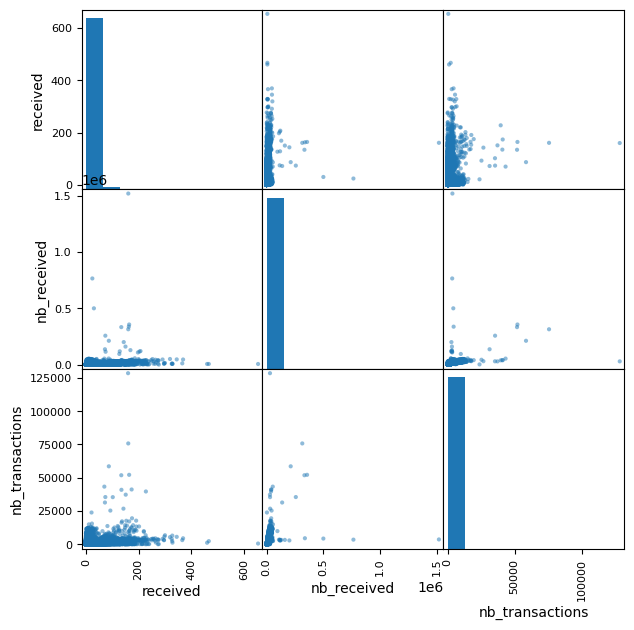

In [55]:
pd.plotting.scatter_matrix(df_actor_scaled[interresting_col], figsize=(7,7))

In [61]:
from sklearn.cluster import KMeans

inertia = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(df_actor_scaled)
    inertia.append(kmeans.inertia_)




C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

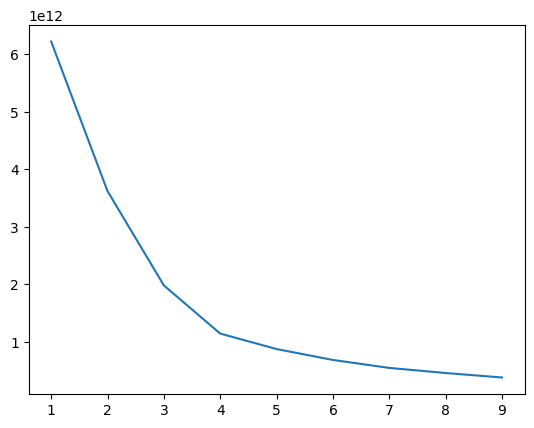

In [63]:
plt.plot(range(1, 10), inertia)
plt.show()

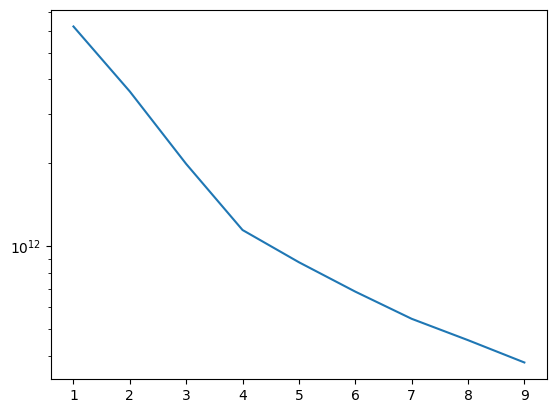

In [64]:
plt.plot(range(1, 10), inertia)
plt.yscale('log')
plt.show()

C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

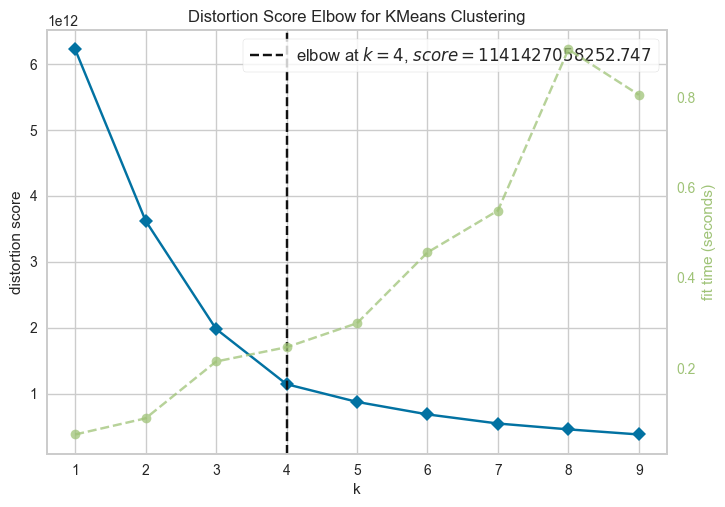

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [65]:
from yellowbrick.cluster import KElbowVisualizer

model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1,10))
visualizer.fit(df_actor_scaled)
visualizer.show()

In [78]:
model = KMeans(n_clusters=4, random_state=0)
model.fit(df_actor_scaled)
labels = model.labels_
df_actor_scaled['cluster'] = labels 
df_actor_scaled.head(5)

C:\Users\chars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\chars\AppData\Local\Temp\ipykernel_14268\3103938143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actor_scaled['cluster'] = labels


,received,nb_received,nb_transactions,sent,nb_spent,spent,cluster
0,-0.075172,4.0,4.0,-0.085126,8.0,-0.070300,0
1,-0.020498,5.0,1.0,-0.089525,2.0,-0.076276,0
2,-0.137759,29.0,11.0,-0.133122,22.0,-0.136331,0
3,0.804999,70.0,54.0,0.647694,108.0,0.925341,0
4,-0.106900,193.0,45.0,-0.062221,84.0,-0.041214,0


In [83]:
cluster1 = df_actor[df_actor_scaled['cluster'] == 0]
cluster2 = df_actor[df_actor_scaled['cluster'] == 1]
cluster3 = df_actor[df_actor_scaled['cluster'] == 2]
cluster4 = df_actor[df_actor_scaled['cluster'] == 3]


In [84]:
print(cluster1.shape, cluster2.shape, cluster3.shape, cluster4.shape)

(88795, 15) (1, 15) (1599, 15) (8, 15)


In [85]:
print(cluster1['received'].mean())
print(cluster3['received'].mean())

64454452659.9358
1052096471574.2933


In [89]:
identities_cluster1 = cluster1['identity'].unique()
identities_cluster1

array(['HappyCoins.com', '821', 'FortuneJack.com', '396',
       'SatoshiMines.com', '0', '641', 'Rollin.io', 'SatoshiDice.com',
       'Loanbase.com', 'Bitstamp.net', '289', 'Paymium.com', '417',
       'YoBit.net', 'FYBSG.com', '1391', '101', 'Poloniex.com', '469',
       '61400549', 'Bitbond.com', '70063369', '71842975',
       'HolyTransaction.com', '107', '16621', '5162', '61',
       'SlushPool.com', 'BTCJam.com', 'Matbea.com', '18972',
       'TheRockTrading.com', 'Huobi.com', 'HaoBTC.com', 'SafeDice.com',
       'CoinSpot.com.au', '1805', '1138', 'CoinMotion.com', 'Xapo.com',
       '898', 'CoinGaming.io', 'OKCoin.com', 'BitZillions.com', '175',
       '523', 'SecondsTrade.com', 'BitcoinFog', '999Dice.com', 'BX.in.th',
       'SimpleCoin.cz', '7277', '227', 'BTC-e.com', 'PocketDice.io',
       '348', '73832915', '72472408', 'BitBargain.co.uk', 'Bter.com',
       '269', '35', '74304487', '69383113', '71554939', '57',
       'BtcTrade.com', '421', 'Cryptonator.com', 'BTCC.com', '

In [91]:
identities_cluster3 = cluster3['identity'].unique()
identities_cluster3

array(['ePay.info_CoinJoinMess', 'LuckyB.it', '0',
       'CoinTrader.net_LocalBitcoins.com', 'BTCJam.com', 'Huobi.com',
       'Xapo.com', 'Poloniex.com', '354'], dtype=object)

In [92]:
count = 0
for identity in identities_cluster3:
    if (identity in identities_cluster1):
        count += 1
print(f"{count} / {len(identities_cluster3)}")

9 / 9
